In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 1:25,01-02-2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape


(1156, 7)

In [4]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


In [5]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')


In [6]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


In [7]:
dataset.dropna(inplace=True)


In [8]:
dataset.drop_duplicates(inplace=True)


In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size # Indent this line
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

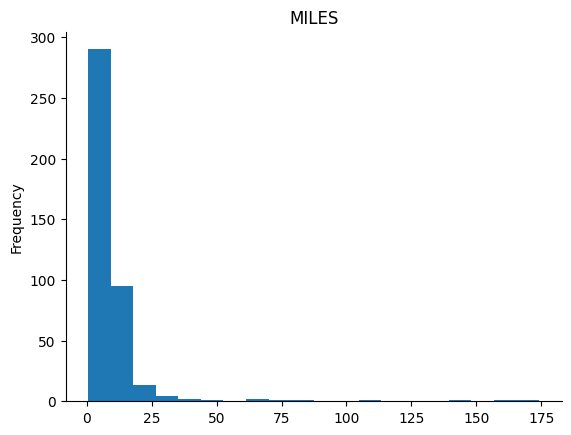

In [11]:
# @title MILES

from matplotlib import pyplot as plt
dataset['MILES'].plot(kind='hist', bins=20, title='MILES')
plt.gca().spines[['top', 'right',]].set_visible(False)

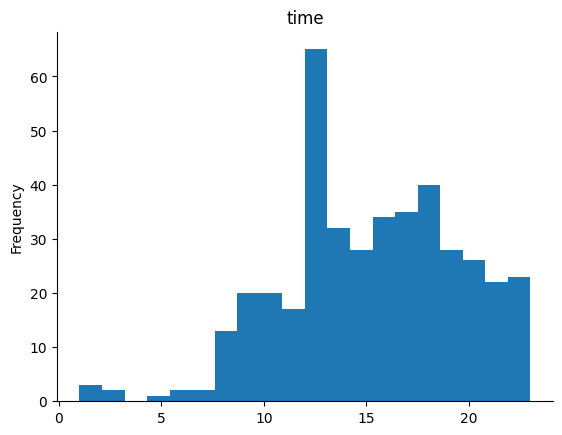

In [12]:
# @title time

from matplotlib import pyplot as plt
dataset['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

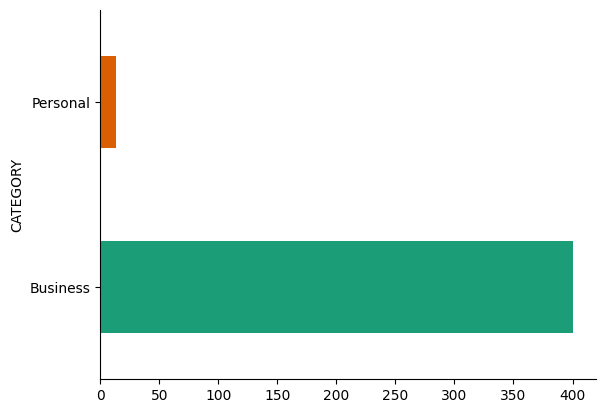

In [13]:
# @title CATEGORY

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('CATEGORY').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

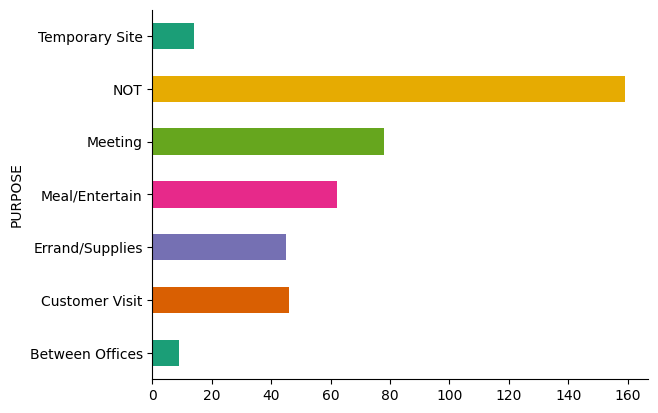

In [14]:
# @title PURPOSE

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('PURPOSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

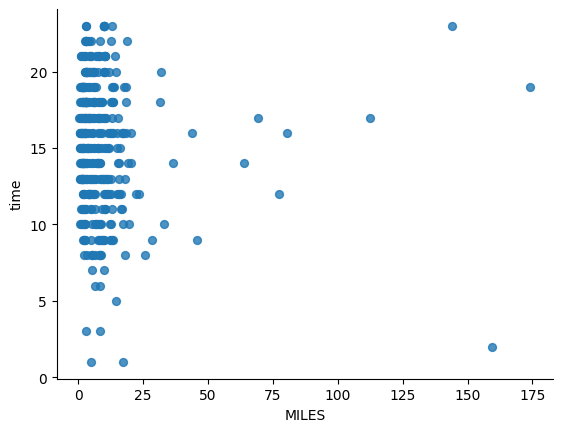

In [15]:
# @title MILES vs time

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='MILES', y='time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

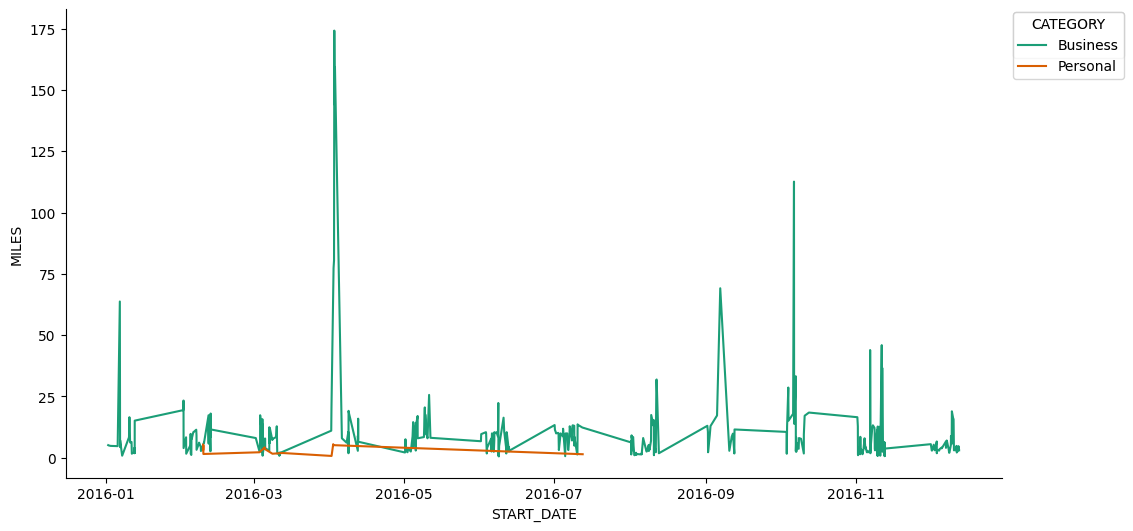

In [16]:
# @title START_DATE vs MILES

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['START_DATE']
  ys = series['MILES']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('START_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CATEGORY')):
  _plot_series(series, series_name, i)
  fig.legend(title='CATEGORY', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('START_DATE')
_ = plt.ylabel('MILES')

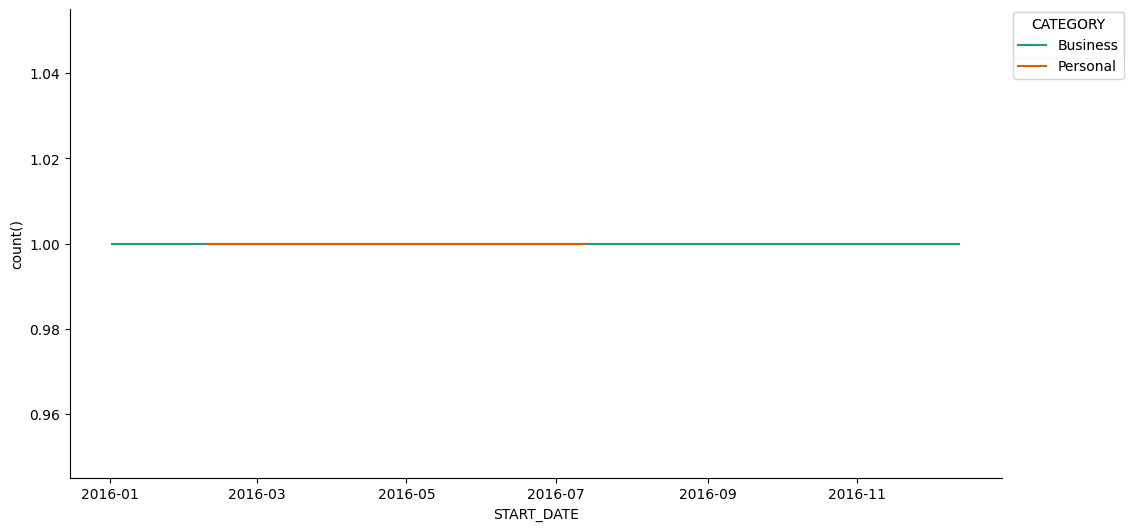

In [17]:
# @title START_DATE vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['START_DATE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'START_DATE'}, axis=1)
              .sort_values('START_DATE', ascending=True))
  xs = counted['START_DATE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('START_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CATEGORY')):
  _plot_series(series, series_name, i)
  fig.legend(title='CATEGORY', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('START_DATE')
_ = plt.ylabel('count()')

<Axes: >

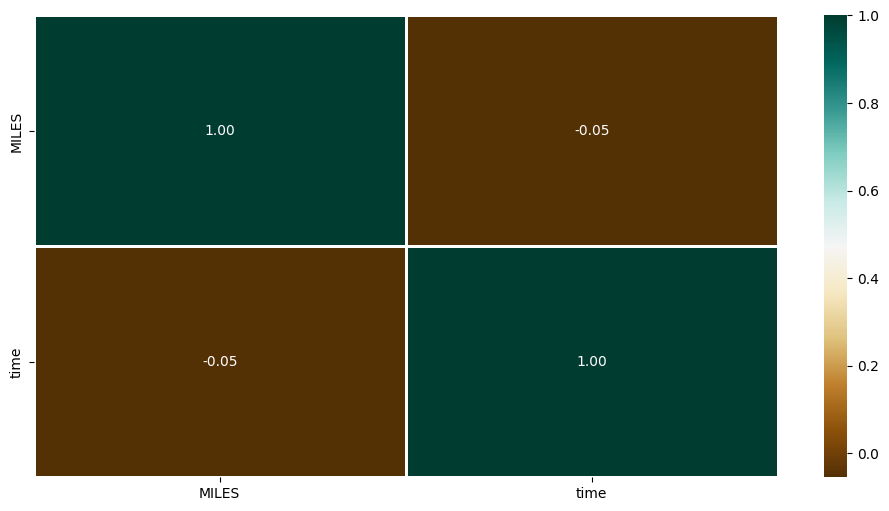

In [19]:
# @title START_DATE vs count()

plt.figure(figsize=(12, 6))
sns.heatmap(dataset.select_dtypes(include=['number']).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<ipython-input-20-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

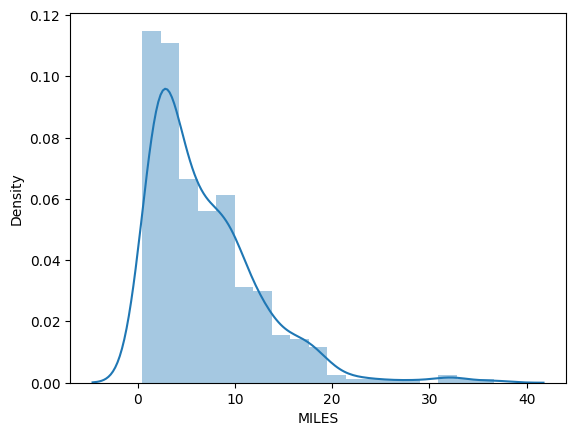

In [20]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])
